# MNIST Dataset

# Objective: 
>Applying PCA and TSNE on the dataset

In [1]:
# Functions to read and show images.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d0=pd.read_csv("mnist_train.csv")

In [3]:
print(d0.head(5))# print first five rows of d0.

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [4]:
# save the labels into a variable l.
l=d0['label']
#Drop the label feature and store the pixel data in d.
d=d0.drop("label",axis=1)


In [5]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


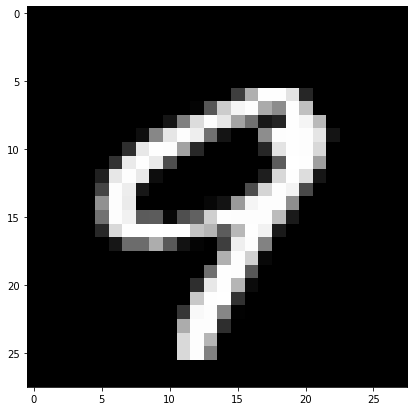

9


In [6]:
# display or plot a number
plt.figure(figsize=(7,7))
idx=100
grid_data=d.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

In [7]:
# Data-preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(d)
print(standardized_data.shape)

(42000, 784)


In [8]:
#find the co-variance matrix which is : A^T * A
sample_data=standardized_data
covar_matrix=np.matmul(sample_data.T,sample_data)
print("THe shape of covariance Matrix is",covar_matrix.shape)

THe shape of covariance Matrix is (784, 784)


In [9]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.
from scipy.linalg import eigh 
values,vectors=eigh(covar_matrix,eigvals=(782,783))
print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors=vectors.T
print(" updated Shape of eigen vectors = ",vectors.shape)

Shape of eigen vectors =  (784, 2)
 updated Shape of eigen vectors =  (2, 784)


In [10]:
# matrix multiplication using numpy
new_coordinates=np.matmul(vectors,sample_data.T)
print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 42000)  =  (2, 42000)


In [11]:
# appending label to the 2d projected data
new_coordinates=np.vstack((new_coordinates,l)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


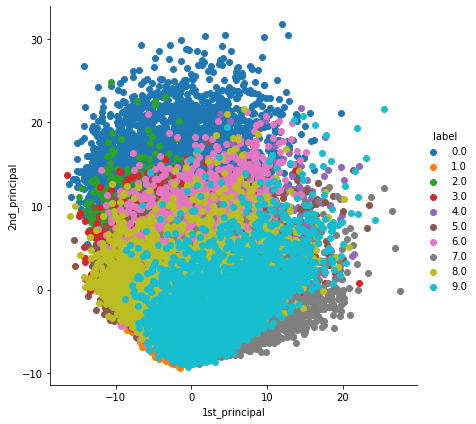

In [12]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

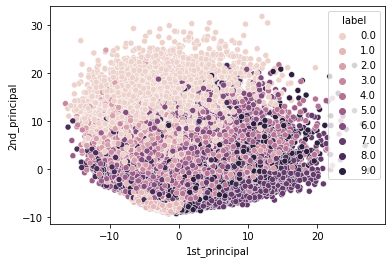

In [13]:
sn.scatterplot(x="1st_principal",y="2nd_principal",legend="full",hue="label",data=dataframe)
plt.show()

# PCA using Scikit-Learn

In [14]:
# initializing the pca
from sklearn import decomposition
pca=decomposition.PCA()


In [16]:
# configuring the parameteres
# the number of components = 2
pca.n_components=2
pca_data=pca.fit_transform(sample_data)
# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)


shape of pca_reduced.shape =  (42000, 2)


In [17]:
# attaching the label for each 2-d data point 
pca_data=np.vstack((pca_data.T,l)).T

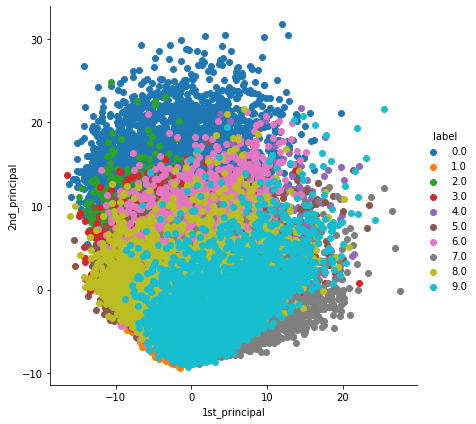

In [18]:
# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA for dimensionality reduction (not for visualization)

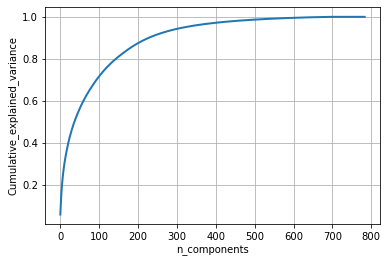

In [21]:
# PCA for dimensionality redcution (non-visualization)
pca.n_components=784
pca_data=pca.fit_transform(sample_data)
percentage_var_explained=pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explained=np.cumsum(percentage_var_explained)
# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()
# If we take 200-dimensions, approx. 90% of variance is expalined.

# t-SNE using Scikit-Learn

c:\users\rex\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


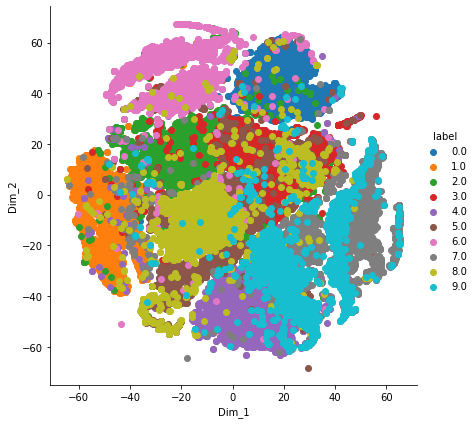

In [22]:
# TSNE
from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0)
tsne_data=model.fit_transform(sample_data)

# creating a new data frame which help us in ploting the result data
tsne_data=np.vstack((tsne_data.T,l)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()


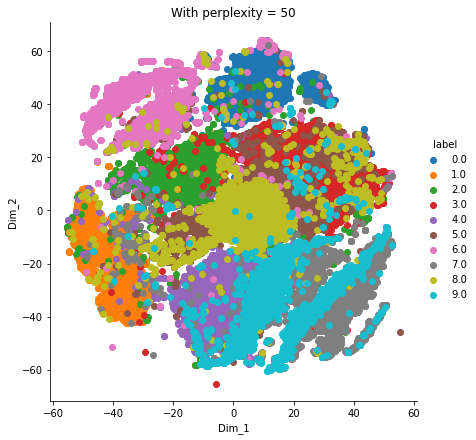

In [23]:
# TSNE
from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0,perplexity=50)
tsne_data=model.fit_transform(sample_data)

# creating a new data frame which help us in ploting the result data
tsne_data=np.vstack((tsne_data.T,l)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()


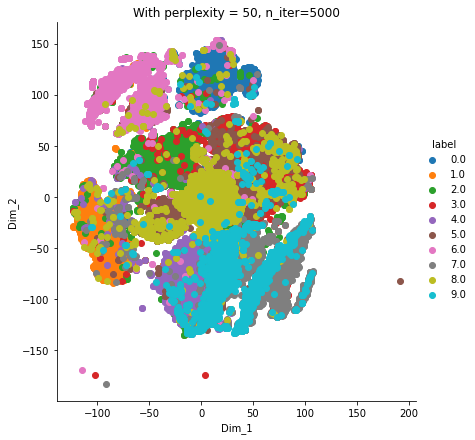

In [24]:
# TSNE
from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)
tsne_data=model.fit_transform(sample_data)

# creating a new data frame which help us in ploting the result data
tsne_data=np.vstack((tsne_data.T,l)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()


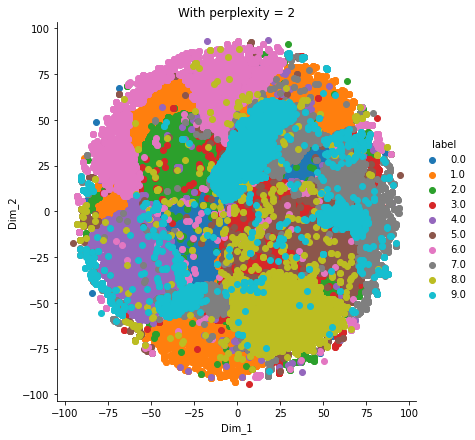

In [25]:
# TSNE
from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0,perplexity=2)
tsne_data=model.fit_transform(sample_data)

# creating a new data frame which help us in ploting the result data
tsne_data=np.vstack((tsne_data.T,l)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()